<a href="https://colab.research.google.com/github/laredein/MyPyTorchTest/blob/master/Withdropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

! git clone https://github.com/laredein/MyPyTorch
import sys
sys.path.append('/content/MyPyTorch')
import layerslib
import optimizer
import model

import keras
import torch
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim
from keras.layers import Activation,Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x=pd.read_csv("/content/MyPyTorch/full.csv")


x=x.drop(columns="Name")
x=x.drop(columns="Ticket")
x=x.drop(columns="Cabin")
x=x.drop(columns="Embarked")
x=x.drop(columns="Name_wiki")
x=x.drop(columns="Boarded")
x=x.drop(columns="Destination")
x=x.drop(columns="Lifeboat")
x=x.drop(columns="Body")
x=x.drop(columns="Class")
x=x.drop(columns="WikiId")
x=x.drop(columns="PassengerId")
x=x.drop(columns="Hometown")
x.head()

fatal: destination path 'MyPyTorch' already exists and is not an empty directory.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_wiki
0,0.0,3,male,22.0,1,0,7.2500,22.0
1,1.0,1,female,38.0,1,0,71.2833,35.0
2,1.0,3,female,26.0,0,0,7.9250,26.0
3,1.0,1,female,35.0,1,0,53.1000,35.0
4,0.0,3,male,35.0,0,0,8.0500,35.0


In [33]:
x.loc[pd.isna(x["Age"]), :]
x.dropna(subset=["Survived"],inplace=True)
x.loc[pd.notna(x["Age"]),"Age"]=x["Age"]
x.loc[pd.isna(x["Age"]),"Age"]=x["Age_wiki"]
x=x.drop(columns="Age_wiki")
c=x["Age"].mean(skipna=True)
x.loc[pd.isna(x["Age"]),"Age"]=c
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,male,22.0,1,0,7.2500
1,1.0,1,female,38.0,1,0,71.2833
2,1.0,3,female,26.0,0,0,7.9250
3,1.0,1,female,35.0,1,0,53.1000
4,0.0,3,male,35.0,0,0,8.0500


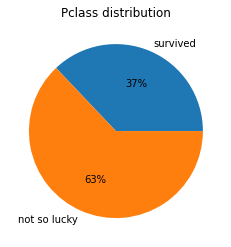

In [34]:
labelenc=LabelEncoder()
x["Survived"]=labelenc.fit_transform(x["Survived"])
xtrain,xtest=train_test_split(x,test_size=0.7)
xtrain.index=pd.RangeIndex(start=0,stop=len(xtrain),step=1)
xtest.index=pd.RangeIndex(start=0,stop=len(xtest),step=1)
one=xtrain.loc[xtrain["Survived"]==1]["Survived"].sum()
two=len(xtrain)-one
plt.pie([one,two],labels=["survived","not so lucky"],autopct="%0.0f%%")
plt.title("Pclass distribution")
plt.show()

In [35]:
c=len(xtrain)-one*2
addarr=[]
for i in range(len(xtrain)):
    if xtrain.iloc[i][0]==1:
        addarr.append(xtrain.iloc[i,:])
addarr=pd.DataFrame(addarr,columns=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"])
addarr.index=pd.RangeIndex(start=0,stop=len(addarr),step=1)
for i in range(c):
  xtrain=xtrain.append(addarr.iloc[i%len(addarr),:])
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


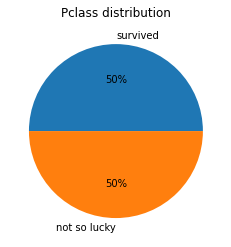

In [36]:
one=xtrain.loc[xtrain["Survived"]==1]["Survived"].sum()
two=len(xtrain)-one
plt.pie([one,two],labels=["survived","not so lucky"],autopct="%0.0f%%")
plt.title("Pclass distribution")
plt.show()

In [37]:
pd.set_option('mode.chained_assignment', None)
sextoint=OneHotEncoder(sparse=False)
xtrain['Sex']=sextoint.fit_transform(xtrain['Sex'].values.reshape(-1,1))
xtest['Sex']=sextoint.fit_transform(xtest['Sex'].values.reshape(-1,1))
ytrain=xtrain["Survived"]
xtrain=xtrain.drop(columns="Survived")
ytest=xtest["Survived"]
xtest=xtest.drop(columns="Survived")
ssc=StandardScaler()

a=ssc.fit_transform(xtrain)
b=ssc.fit_transform(xtest)
c=np.array(ytrain)
d=np.array(ytest)
xtrain=b
xtest=a
ytrain=d
ytest=c
xtrain[:5]

array([[ 0.82812967, -0.76930926, -0.62164908, -0.47702218, -0.47731962,
        -0.48350291],
       [ 0.82812967,  1.29986737, -0.62164908, -0.47702218, -0.47731962,
        -0.48437127],
       [-1.55322017, -0.76930926, -0.04706215, -0.47702218, -0.47731962,
        -0.06251634],
       [-0.36254525, -0.76930926,  0.16840795,  1.22877632, -0.47731962,
         0.76223374],
       [ 0.82812967,  1.29986737,  0.67117151, -0.47702218,  5.34001325,
        -0.07910614]])

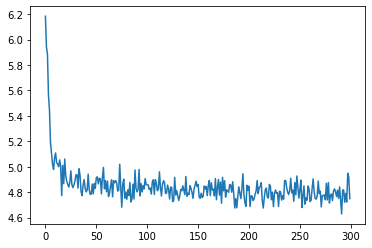

In [38]:
layer1=layerslib.Sigmoid(6,3,True)
layer2=layerslib.Sigmoid(3,2,True)
layer3=layerslib.Sigmoid(2,1,True)
layer2.dropautset(0.2)

layerarr=[layer1,layer2,layer3]
opt=optimizer.SGD(1,0.2,layerarr)
model=model.Seqential(layerslib.MSE(),opt)
curloss=layerslib.MSE()
msegraph=[]
for i in range(300):
    c=0
    for j in range(len(xtrain)):
        opt.zero_grad()
        ourout=model.forward(xtrain[j])
        curloss.loss(ourout,ytrain[j])
        curloss.backward()
        opt.step()
        c=c+curloss.dif**2
    msegraph.append((c/4)**0.5)
y=np.arange(0,len(msegraph))
plt.plot(y,msegraph)
plt.show()


In [39]:
arr=[]
for i in range(len(xtrain)):
    arr.append(model.forward(xtrain[i])[1])
arr=np.array(arr).round()
print(accuracy_score(arr,ytrain))

0.8125
